### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import os
from PIL import Image

%matplotlib inline

### Loading Articles Dataset

In [2]:
articles = pd.read_csv('articles.csv')
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


### Loading Customers Dataset

In [3]:
customers = pd.read_csv('customers.csv')
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


### Loading Transactions Dataset

In [4]:
transactions = pd.read_csv('transactions_train.csv', parse_dates=['t_dat'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   t_dat             datetime64[ns]
 1   customer_id       object        
 2   article_id        int64         
 3   price             float64       
 4   sales_channel_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ GB


### Loading Images

In [5]:
total_folders = total_files = 0
folder_info = []
images_names = []
for base, dirs, files in (os.walk('C:/Users/baind/Dissertation/')):
    for directories in dirs:
        folder_info.append((directories, len(os.listdir(os.path.join(base, directories)))))
        total_folders += 1
    for _files in files:
        total_files += 1
        if len(_files.split(".jpg"))==2:
            images_names.append(_files.split(".jpg")[0])

In [6]:
image_name_df = pd.DataFrame(images_names, columns = ["image_name"])
image_name_df["article_id"] = image_name_df["image_name"].apply(lambda x: int(x[1:]))

In [7]:
image_article_df = articles[["article_id", "product_code", "product_group_name", 
"product_type_name"]].merge(image_name_df, on=["article_id"], how="left")
print(image_article_df.shape)
image_article_df.head()

(105542, 5)


,article_id,product_code,product_group_name,product_type_name,image_name
0,108775015,108775,Garment Upper body,Vest top,0108775015
1,108775044,108775,Garment Upper body,Vest top,0108775044
2,108775051,108775,Garment Upper body,Vest top,0108775051
3,110065001,110065,Underwear,Bra,0110065001
4,110065002,110065,Underwear,Bra,0110065002


### Non-personalised function

In [8]:
from datetime import timedelta

def non_personalised(k, n, data):
    transactions = data.copy()
    df = transactions[transactions.t_dat > transactions.t_dat.max()-timedelta(days=n)]
    df = df.groupby('article_id')['t_dat'].count().reset_index()
    df.columns = ['article_id', 'no_of_times_sold']
    df = df.sort_values('no_of_times_sold', ascending = False)
    df_topk = df[:k].reset_index(drop = True)
    
    return df_topk

### Displaying Images

In [9]:
def show_images(df_topk):
    df_topk_img = df_topk.join(image_article_df[['article_id', 'product_type_name', 'image_name']].set_index(
            'article_id'), on='article_id', how='left')

    for i in df_topk_img['image_name']:
        fig, ax = plt.subplots(1, 1, figsize=(20,6))
        img = Image.open('images/'+str(i)[:3]+'/'+str(i)+'.jpg')
        plt.axis('off')
        plt.title(str(i)+' - '+ df_topk_img.loc[df_topk_img.image_name == i, 'product_type_name'].values[0])
        plt.imshow(img)

### Splitting Data into Training and Testing data

In [5]:
from datetime import timedelta

def split_train_test(n, data):
    trans = data.copy()
    transactions_ndays = data[data.t_dat > data.t_dat.max()-timedelta(days=n)]
    test_data = transactions_ndays
    trans.drop(trans.tail(len(transactions_ndays)).index, inplace = True)
    train_data = trans
    return train_data, test_data

#### Removing new customers from test data

In [6]:
def remove_new_customers(data1, data2):
    cust_list1 = list(data1['customer_id'].unique())
    cust_list2 = list(data2['customer_id'].unique())
    for customer in cust_list1:
        if customer not in cust_list2:
            data1 = data1.drop(labels=data1[data1['customer_id'] == customer].index)
    return data1

#### Downsizing the test data

In [7]:
import random

def downsize(data, n):
    unique_cust_ids = list(data['customer_id'].unique())
    sample_cust_ids = random.sample(unique_cust_ids, n)
    downsized_data = data[data['customer_id'].isin(sample_cust_ids)]
    return downsized_data

In [8]:
train, test = split_train_test(7, transactions)

In [13]:
train

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31548008,2020-09-15,ffe41634ff990908faacbb465063e027e7c39499f8dfc1...,850917001,0.025407,1
31548009,2020-09-15,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b322...,853316001,0.008458,1
31548010,2020-09-15,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b322...,296366006,0.000847,1
31548011,2020-09-15,ffef8aec5cf011fa1393b40337a5993ce0b7b81af6b322...,789769001,0.013542,1


In [9]:
test

,t_dat,customer_id,article_id,price,sales_channel_id
31548013,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,786022008,0.048441,2
31548014,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,913272003,0.032288,2
31548015,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,889669006,0.056508,2
31548016,2020-09-16,0010e8eb18f131e724d6997909af0808adbba057529edb...,237347060,0.033881,1
31548017,2020-09-16,0010e8eb18f131e724d6997909af0808adbba057529edb...,562245001,0.013542,1
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [15]:
new_test_data = downsize(test, 1000)

In [16]:
new_test_data

,t_dat,customer_id,article_id,price,sales_channel_id
31548046,2020-09-16,00606f86a995447df68f65e3e05e97f63cb5d1a6d27daa...,908380001,0.016932,1
31548141,2020-09-16,011dd47f83cb062f9616e64736996288f93fd513574e4b...,783707096,0.003678,2
31548142,2020-09-16,011dd47f83cb062f9616e64736996288f93fd513574e4b...,783707096,0.003678,2
31548143,2020-09-16,011dd47f83cb062f9616e64736996288f93fd513574e4b...,783707168,0.003695,2
31548144,2020-09-16,011dd47f83cb062f9616e64736996288f93fd513574e4b...,701057008,0.007390,2
...,...,...,...,...,...
31787544,2020-09-22,f961392d5d5e3a6f51824c2460209e5c7adb7391cc538c...,915292001,0.025407,2
31787545,2020-09-22,f961392d5d5e3a6f51824c2460209e5c7adb7391cc538c...,918292003,0.042356,2
31787546,2020-09-22,f961392d5d5e3a6f51824c2460209e5c7adb7391cc538c...,868823005,0.025407,2
31787547,2020-09-22,f961392d5d5e3a6f51824c2460209e5c7adb7391cc538c...,866731001,0.025407,2


In [50]:
len(new_test_data['customer_id'].unique())

1000

In [10]:
test_data_without_new_cust = remove_new_customers(test, train)

In [11]:
test_data_without_new_cust

,t_dat,customer_id,article_id,price,sales_channel_id
31548013,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,786022008,0.048441,2
31548014,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,913272003,0.032288,2
31548015,2020-09-16,000fb6e772c5d0023892065e659963da90b1866035558e...,889669006,0.056508,2
31548016,2020-09-16,0010e8eb18f131e724d6997909af0808adbba057529edb...,237347060,0.033881,1
31548017,2020-09-16,0010e8eb18f131e724d6997909af0808adbba057529edb...,562245001,0.013542,1
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [12]:
new_test_data_without_new_cust = downsize(test_data_without_new_cust, 1000)

In [13]:
new_test_data_without_new_cust

,t_dat,customer_id,article_id,price,sales_channel_id
31548106,2020-09-16,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,892309003,0.016932,2
31548107,2020-09-16,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,892309003,0.016932,2
31548108,2020-09-16,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,757971001,0.022017,2
31548109,2020-09-16,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,757971001,0.022017,2
31548110,2020-09-16,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,757971001,0.022017,2
...,...,...,...,...,...
31787865,2020-09-22,fc05d856455dfccf1e2ffb91fcef92b4c037a86d1a0f7a...,893432002,0.033881,2
31787879,2020-09-22,fc402eb5260f910db839608890dd7f2b56645e6d43f5a6...,936622001,0.025407,2
31787880,2020-09-22,fc402eb5260f910db839608890dd7f2b56645e6d43f5a6...,909869001,0.025407,2
31787982,2020-09-22,fd317c749b129fcdb482423c8269d19c161a719c8045e3...,828268003,0.040661,2


### Converting test data into dictionary of customers and articles

In [17]:
test_df = new_test_data.copy()
test_df['article_id'] = test_df['article_id'].astype(str) + ' '
test_df = pd.DataFrame(test_df.groupby('customer_id').article_id.sum())

In [52]:
test_df = test_df.reset_index()

In [53]:
test_df

,customer_id,article_id
0,009036de9af83a9007908591e2c6e551860e0474e5b823...,909914001 915529003 866731001 879291001
1,00ae9aa00317595e62a0f782228d3a98e017d071d03049...,808648001 808648001
2,00c7b0d0958cdaba2aa31ff2b02e4b7fff952e823fad23...,921671001
3,00d77f043a22a161d8e2f7f0b0e5684290948c76c34b27...,901433001
4,01509b6433e843523eaecd8edc6f41fa962b314b1bd291...,673677026
...,...,...
995,ff07b1bca62eedab9778fffd7494a6e17dff218425a65a...,806241009 762600009
996,ff0bc7d7b5b4434c3d1230709650aa67c64f4b3c161492...,766346003 915529003
997,ff7313f354e805f6ace690ddaa753d302341dd810a4a59...,904671001 903359001 886566001 914805002 857030...
998,ffc197751ef56add717e78d7611d409b94c37d1f7aa900...,700429002


In [18]:
test_df_without_new_cust = new_test_data_without_new_cust.copy()
test_df_without_new_cust['article_id'] = test_df_without_new_cust['article_id'].astype(str) + ' '
test_df_without_new_cust = pd.DataFrame(test_df_without_new_cust.groupby('customer_id').article_id.sum()).reset_index()

In [19]:
test_df_without_new_cust

,customer_id,article_id
0,00b2e2bdedcd55e1509bcd3bdd69b4167fabee49e6bb29...,706016015
1,00e45ba47fb90efa4728bcd4583ad03ae4a9fafdcc198f...,892309003 892309003 757971001 757971001 757971...
2,00e715cbf3cbc3ec5c2c6a2a6ba26bd4e6b4f6930208b3...,375917006
3,00fa33158eb59432984490a9c7bac5897496e841cca799...,932243001 914441005 882900004 732842014 749699...
4,0104bee289e6af328d9c2502f1808e230623c4587e0ddc...,893820001 923758001 946095001 834924005 865929...
...,...,...
995,ff0127319ea7e48c5f9d8afc0deb61395273d9f743db9e...,886390001 554598083
996,ff0cc5d86cd1c7751ae443e8357b9d23681d2c5f67919f...,879166004 879166004
997,ff335bffc52a0462f8ab27fb51fc11f27333a86a320b84...,764073002
998,ff49f903b3a7105d373c80b019a5dc169e37a16e55cbe1...,861565001 861565001 869706001 878183003 891591...


### Creating content-based function

In [19]:
train_df = train.copy()
train_df['article_id'] = train_df['article_id'].astype(str) + ' '
train_df = pd.DataFrame(train_df.groupby('customer_id').article_id.sum())

In [20]:
train_df = train_df.reset_index()

In [21]:
articles_product_code_df = articles.copy()
articles_product_code_df['article_id'] = articles_product_code_df['article_id'].astype(str) + ' '
articles_product_code_df = pd.DataFrame(articles_product_code_df.groupby(
    'product_code').article_id.sum()).reset_index()

In [22]:
articles_product_type_df = articles.copy()
articles_product_type_df['article_id'] = articles_product_type_df['article_id'].astype(str) + ' '
articles_product_type_df = pd.DataFrame(articles_product_type_df.groupby(
    'product_type_no').article_id.sum()).reset_index()

In [46]:
def content_based(n, k, data, articles_product_code_df, articles_product_type_df):
    recommendations = {}
    for cust in data:
        if (cust in list(train_df['customer_id'])):
            article_ids = train_df[train_df['customer_id']==cust]['article_id'].array[0][:-1].split(' ')
            
            if len(article_ids) >= n:
                article_ids = article_ids[:n]
            
            no_recs_each_item = k//len(article_ids)
            no_extra_rec = k%len(article_ids)
            rec_articles = []
            for a in article_ids:
                p_code = articles[articles['article_id']==int(a)]['product_code'].array[0]
                p_type = articles[articles['article_id']==int(a)]['product_type_no'].array[0]
        
                rec_article_ids = articles_product_code_df[articles_product_code_df['product_code']==p_code]['article_id'].array[0][:-1].split(' ')
            
                rec_article_ids.remove(str(a))
                if(len(rec_article_ids) < no_recs_each_item):
                    more_rec_article_ids = articles_product_type_df[articles_product_type_df['product_type_no']==p_type]['article_id'].array[0][:-1].split(' ')
                
                    for i in more_rec_article_ids:
                        if i not in rec_article_ids:
                            rec_article_ids.append(i)
                    rec_article_ids.remove(str(a))
                rec_list = rec_article_ids[:no_recs_each_item]
                
                if(no_extra_rec !=0):
                    rec_list = rec_article_ids[no_recs_each_item:no_extra_rec]

                rec_articles.extend(rec_list)
            if(len(rec_articles) < k):
                sub = k-len((rec_articles))
                for i in range(sub):
                    rec_articles.append(0)

            recommendations[cust]=rec_articles
        else:
            recommendations[cust]=[0]*k
    
    return recommendations

### User-Item Matrix

In [20]:
trans_df = transactions.copy()

In [21]:
ALL_USERS = trans_df['customer_id'].unique().tolist()
ALL_ITEMS = trans_df['article_id'].unique().tolist()
user_ids = dict(list(enumerate(ALL_USERS)))
item_ids = dict(list(enumerate(ALL_ITEMS)))
user_map = {u: uidx for uidx, u in user_ids.items()}
item_map = {i: iidx for iidx, i in item_ids.items()}
trans_df['user_id'] = trans_df['customer_id'].map(user_map)
trans_df['item_id'] = trans_df['article_id'].map(item_map)

In [22]:
train, test = split_train_test(7, trans_df)

In [23]:
user_item_df = train.groupby(['user_id', 'item_id'])['t_dat'].count().reset_index()
user_item_df = user_item_df.rename(columns = {'t_dat': 'purchase_count'})

In [24]:
values = user_item_df.purchase_count.values
row = user_item_df.user_id.values
column = user_item_df.item_id.values

In [25]:
#importing sparse matrix module
from scipy.sparse import csr_matrix

In [26]:
sparse_user_item_matrix = csr_matrix((values, (row, column)), shape=(len(ALL_USERS), len(ALL_ITEMS)))

### Using ALS from Implicit Library

In [27]:
from implicit.als import AlternatingLeastSquares

In [28]:
model = AlternatingLeastSquares(factors=40, iterations=10, random_state=42)
model.fit(sparse_user_item_matrix)

c:\Users\baind\anaconda3\lib\site-packages\implicit\utils.py:33: UserWarning: Intel MKL BLAS detected. Its highly recommend to set the environment variable 'export MKL_NUM_THREADS=1' to disable its internal multithreading
  warnings.warn(
100%|██████████| 10/10 [01:52<00:00, 11.26s/it]


### Defining ALS Recommendation function

In [29]:
def als_recommend(n: int, cust_id_list: list, data: pd.DataFrame, sparse_matrix: object)->list:
    '''
    Uses ALS to generate recommendations for customers
    ---------------
    parameters:
        n: number of recommended items
        data: list of customer_ids
    '''
    recommendations = []
    for cust in cust_id_list:
        user_id = data[data['customer_id']==cust]['user_id'].array[0]
        item_ids = model.recommend(userid=user_id, N=n, user_items=sparse_matrix[user_id])[0]
        article_ids = []
        for item in item_ids:
            article_id = data[data['item_id']==item]['article_id'].array[0]
            article_ids.append(article_id)
        recommendations.append(article_ids)
    return recommendations

### Defining MAP

In [30]:
def apk(actual, predicted, k=10):
    if len(predicted)>k:
        predicted = predicted[:k]
    score = 0.0
    num_hits = 0.0
    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)
    if not actual:
        return 0.0
    return score / min(len(actual), k)


def mapk(actual, predicted, k=10):
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

### Defining Average Precision

In [31]:
def avg_precision(actual, predicted):
    precision=0
    for act,pred in zip(actual, predicted):
        sum = 0
        for p in pred:
            if p in act:
                sum+=1.0
        precision+=(sum/len(pred))
        
    return precision/len(actual)

### Defining Average Recall

In [32]:
def avg_recall(actual, predicted):
    recall=0
    for act,pred in zip(actual, predicted):
        sum = 0
        for p in pred:
            if p in act:
                sum+=1.0
        recall+=(sum/len(act))
        
    return recall/len(actual)

#### Evaluating Non-Personalised Recommendations

##### With new Customers

In [73]:
k=20
df_topk = non_personalised(k, 7, train)
df_topk

,article_id,no_of_times_sold
0,909370001,1283
1,865799006,768
2,918522001,729
3,924243001,704
4,448509014,609
5,751471001,607
6,809238001,563
7,918292001,546
8,762846027,539
9,809238005,503


In [74]:
np_recs = df_topk['article_id'].values
recs = list(np_recs)
p_list = []
for i in range(len(test)):
    p_list.append(recs)

In [75]:
articles_list = test_df['article_id'].to_list()
a_list = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    a_list.append(arr)

In [76]:
map_np = mapk(a_list, p_list, 50)
map_np

0.006613078996284719

In [77]:
p_score = avg_precision(a_list, p_list)
p_score

0.004899999999999993

In [78]:
r_score = avg_recall(a_list, p_list)
r_score

0.03019733501792324

#### Without new customers

In [111]:
articles_list = test_df_without_new_cust['article_id'].to_list()
a_list = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    a_list.append(arr)

In [112]:
map_np = mapk(a_list, p_list, 50)
map_np

0.007886433296327048

In [113]:
p_score = avg_precision(a_list, p_list)
p_score

0.005699999999999991

In [114]:
r_score = avg_recall(a_list, p_list)
r_score

0.03434878454878454

#### Evaluating Non-Personalised function for Recommendations from 1 to 100

In [117]:
def non_personalised_multiple_recommendations(n, data):
    mapk_list=[]
    avg_precision_list=[]
    avg_recall_list=[]
    for k in range (1, 101):
        df_k_recommendations = non_personalised(k, n, data)

        #Creating list of predicted items
        np_recs = df_k_recommendations['article_id'].values
        recs = list(np_recs)
        p_list = []
        for i in range(len(test)):
            p_list.append(recs)
        
        #Creating list of actual items bought by the user
        articles_list = test_df['article_id'].to_list()
        a_list = []
        for a in articles_list:
            arr=a[:-1].split(' ')
            arr=[int(value) for value in arr]
            a_list.append(arr)

        
        mapk_list.append(mapk(a_list, p_list, k))
        avg_precision_list.append(avg_precision(a_list, p_list))
        avg_recall_list.append(avg_recall(a_list, p_list))

    return mapk_list, avg_precision_list, avg_recall_list
        


In [138]:
mapk_vals, avg_precision_vals, avg_recall_vals = non_personalised_multiple_recommendations(7, train)

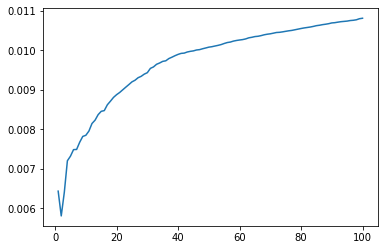

In [144]:
x = [i for i in range(1, 101)]
y1 = mapk_vals
plt.plot(x,y1)
plt.show()

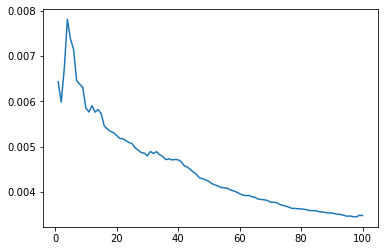

In [145]:
y2 = avg_precision_vals
plt.plot(x,y2)
plt.show()

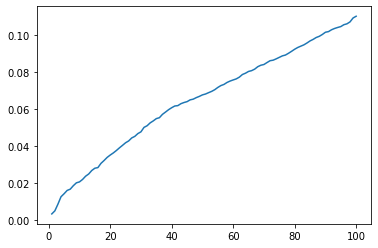

In [146]:
y3 = avg_recall_vals
plt.plot(x,y3)
plt.show()

#### Evaluating Content-Based Recommendations

#### WIth new Customers

In [81]:
k=20
cust_ids = list(test_df['customer_id'])
content_based_recs = content_based(5, k, cust_ids, articles_product_code_df, articles_product_type_df)

In [82]:
customer_ids = []
recommended_article_ids = []
for k in content_based_recs:
    customer_ids.append(k)
    recommended_article_ids.append(content_based_recs[k])
content_based_recommendations = pd.DataFrame(zip(customer_ids, recommended_article_ids))
content_based_recommendations.columns = ['customer_id', 'recommended_article_id']


In [83]:
content_based_recommendations

,customer_id,recommended_article_id
0,009036de9af83a9007908591e2c6e551860e0474e5b823...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,00ae9aa00317595e62a0f782228d3a98e017d071d03049...,"[189626001, 189654001, 189654045, 189654046, 1..."
2,00c7b0d0958cdaba2aa31ff2b02e4b7fff952e823fad23...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,00d77f043a22a161d8e2f7f0b0e5684290948c76c34b27...,"[118458003, 118458004, 118458028, 118458029, 6..."
4,01509b6433e843523eaecd8edc6f41fa962b314b1bd291...,"[695632001, 695632002, 695632003, 695632004, 5..."
...,...,...
995,ff07b1bca62eedab9778fffd7494a6e17dff218425a65a...,"[638899002, 111586001, 120129001, 120129014, 1..."
996,ff0bc7d7b5b4434c3d1230709650aa67c64f4b3c161492...,"[111586001, 120129001, 120129014, 120129018, 1..."
997,ff7313f354e805f6ace690ddaa753d302341dd810a4a59...,"[652731001, 652731003, 652731006, 652731007, 6..."
998,ffc197751ef56add717e78d7611d409b94c37d1f7aa900...,"[507909001, 507909002, 507909003, 507909006, 5..."


In [84]:
test_df

,customer_id,article_id
0,009036de9af83a9007908591e2c6e551860e0474e5b823...,909914001 915529003 866731001 879291001
1,00ae9aa00317595e62a0f782228d3a98e017d071d03049...,808648001 808648001
2,00c7b0d0958cdaba2aa31ff2b02e4b7fff952e823fad23...,921671001
3,00d77f043a22a161d8e2f7f0b0e5684290948c76c34b27...,901433001
4,01509b6433e843523eaecd8edc6f41fa962b314b1bd291...,673677026
...,...,...
995,ff07b1bca62eedab9778fffd7494a6e17dff218425a65a...,806241009 762600009
996,ff0bc7d7b5b4434c3d1230709650aa67c64f4b3c161492...,766346003 915529003
997,ff7313f354e805f6ace690ddaa753d302341dd810a4a59...,904671001 903359001 886566001 914805002 857030...
998,ffc197751ef56add717e78d7611d409b94c37d1f7aa900...,700429002


In [85]:
actual_predicted_df = pd.merge(content_based_recommendations, test_df, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,009036de9af83a9007908591e2c6e551860e0474e5b823...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",909914001 915529003 866731001 879291001
1,00ae9aa00317595e62a0f782228d3a98e017d071d03049...,"[189626001, 189654001, 189654045, 189654046, 1...",808648001 808648001
2,00c7b0d0958cdaba2aa31ff2b02e4b7fff952e823fad23...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",921671001
3,00d77f043a22a161d8e2f7f0b0e5684290948c76c34b27...,"[118458003, 118458004, 118458028, 118458029, 6...",901433001
4,01509b6433e843523eaecd8edc6f41fa962b314b1bd291...,"[695632001, 695632002, 695632003, 695632004, 5...",673677026
...,...,...,...
995,ff07b1bca62eedab9778fffd7494a6e17dff218425a65a...,"[638899002, 111586001, 120129001, 120129014, 1...",806241009 762600009
996,ff0bc7d7b5b4434c3d1230709650aa67c64f4b3c161492...,"[111586001, 120129001, 120129014, 120129018, 1...",766346003 915529003
997,ff7313f354e805f6ace690ddaa753d302341dd810a4a59...,"[652731001, 652731003, 652731006, 652731007, 6...",904671001 903359001 886566001 914805002 857030...
998,ffc197751ef56add717e78d7611d409b94c37d1f7aa900...,"[507909001, 507909002, 507909003, 507909006, 5...",700429002


In [86]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [87]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [88]:
map_cb = mapk(actual, predicted, 50)
map_cb

0.002021908939014202

In [89]:
p_score = avg_precision(actual, predicted)
p_score

0.0004999999999999999

In [90]:
r_score = avg_recall(actual, predicted)
r_score

0.004416666666666667

#### Without new customers

In [115]:
k=20
cust_ids = list(test_df_without_new_cust['customer_id'])
content_based_recs = content_based(5, k, cust_ids, articles_product_code_df, articles_product_type_df)

In [116]:
customer_ids = []
recommended_article_ids = []
for k in content_based_recs:
    customer_ids.append(k)
    recommended_article_ids.append(content_based_recs[k])
content_based_recommendations = pd.DataFrame(zip(customer_ids, recommended_article_ids))
content_based_recommendations.columns = ['customer_id', 'recommended_article_id']

In [117]:
actual_predicted_df = pd.merge(content_based_recommendations, test_df_without_new_cust, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,0040e2fc2d1e7931a38355aca56b2c62b87e65051b7287...,"[277738002, 277738011, 277738012, 319811019, 5...",799365001 799365028 863646004
1,004a44473a84b8809a136aac040eae2e567f85031949eb...,"[235596002, 292453003, 292453009, 292453011, 6...",918292003 849487001
2,007ce0bc11eeab9b58cb2ab04715c6a5c478828aa3b7a7...,"[743616002, 743616009, 118458003, 118458004, 1...",925666003 893133001 918894002 456163083 802023...
3,00c0875075599d2b44846b94f2368b174448dfd50fd178...,"[632143002, 189626001, 189654001, 189654045, 6...",715624001 677930086
4,0114b9ec6bcf634a60b7c259101f706cc3c3ba8cd6891f...,"[663007001, 663007004, 663007006, 663007007, 5...",916415002 897423002
...,...,...,...
995,fed66fd2a9c2f7af755813db23e7fdce433c9706960b2b...,"[634744003, 634744005, 634744009, 634744010, 6...",870328002 759482001 873279005
996,fee8b241153e748c206d808f567d9fa9d31843f2d73db0...,"[118458003, 118458004, 118458028, 118458029, 1...",673677024 673677004 673677002 906794003 906794...
997,ff59469d169167c83a5cb4643892c41351b8d181b33136...,"[554598001, 554598002, 554598004, 554598007, 5...",889550001
998,ff92975688a62c6bead4091dc401b38ff9bb31889db34d...,"[316441001, 316441006, 316441008, 316441011, 6...",874891002 874891002 874891003 874891003


In [118]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [119]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [120]:
map_cb = mapk(actual, predicted, 50)
map_cb

0.0018345451418206836

In [121]:
p_score = avg_precision(actual, predicted)
p_score

0.0006

In [122]:
r_score = avg_recall(actual, predicted)
r_score

0.0057

### Evaluating ALS

#### With new Customers

In [92]:
k=20
cust_list = list(set(new_test_data['customer_id'].to_list()))
als_recommendations = als_recommend(k, cust_list, trans_df, sparse_user_item_matrix)

In [95]:
als_recommendations_df = pd.DataFrame(zip(cust_list, als_recommendations))
als_recommendations_df.columns = ['customer_id', 'recommended_article_id']

In [96]:
als_recommendations_df

,customer_id,recommended_article_id
0,e9ed8cba67c9057f8ede3a0f71183583fa9ec6cb80a7be...,"[678942001, 579541001, 664074001, 673396002, 3..."
1,81b0b53022e029935313f340f78e85285b89b274d9ab05...,"[759871003, 759871004, 733749001, 559630026, 5..."
2,a1161a62a6e20360e48d109c52d08442218fdf13652527...,"[685816001, 685816002, 685813001, 685814001, 7..."
3,33b8a520ca3e9a9eda9f63155ee628ab71949f626bf0fe...,"[741356002, 720125001, 717490008, 554479001, 8..."
4,29d4db756dbe47d53cf3fb088dc09745d45333ca068ed3...,"[507909001, 610776001, 695632002, 772005009, 5..."
...,...,...
995,43830264a98188a81c5331186eb7e1bfbb56cc013be510...,"[351484002, 723529001, 699080001, 599580038, 5..."
996,c298e6213dfb1d74e74b917a184ccac4de7be9ba216172...,"[749699002, 749699001, 716672001, 678942001, 6..."
997,51b2f31743b8660474a1897ce89160eba3105db39d8f31...,"[676827002, 680187001, 631848002, 671505001, 6..."
998,dfda51d629ba862c61c3db2e60933790aad0112766bcaa...,"[562245001, 706016015, 706016006, 562245018, 5..."


In [97]:
actual_predicted_df = pd.merge(als_recommendations_df, test_df, on='customer_id')
actual_predicted_df

,customer_id,recommended_article_id,article_id
0,e9ed8cba67c9057f8ede3a0f71183583fa9ec6cb80a7be...,"[678942001, 579541001, 664074001, 673396002, 3...",826508007 905660002
1,81b0b53022e029935313f340f78e85285b89b274d9ab05...,"[759871003, 759871004, 733749001, 559630026, 5...",372860001 914441004
2,a1161a62a6e20360e48d109c52d08442218fdf13652527...,"[685816001, 685816002, 685813001, 685814001, 7...",739590041
3,33b8a520ca3e9a9eda9f63155ee628ab71949f626bf0fe...,"[741356002, 720125001, 717490008, 554479001, 8...",932243002 933989001 923134002 921671001 922048...
4,29d4db756dbe47d53cf3fb088dc09745d45333ca068ed3...,"[507909001, 610776001, 695632002, 772005009, 5...",909912001 856270003 909911001 918292011
...,...,...,...
995,43830264a98188a81c5331186eb7e1bfbb56cc013be510...,"[351484002, 723529001, 699080001, 599580038, 5...",918890002 907188003
996,c298e6213dfb1d74e74b917a184ccac4de7be9ba216172...,"[749699002, 749699001, 716672001, 678942001, 6...",902802005 902802002
997,51b2f31743b8660474a1897ce89160eba3105db39d8f31...,"[676827002, 680187001, 631848002, 671505001, 6...",895376004 906097002 918240001
998,dfda51d629ba862c61c3db2e60933790aad0112766bcaa...,"[562245001, 706016015, 706016006, 562245018, 5...",819547001 846353001


In [98]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [100]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [101]:
map_als = mapk(actual, predicted, 50)
map_als

0.0031008126953803645

In [102]:
p_score = avg_precision(actual, predicted)
p_score

0.0018500000000000012

In [103]:
r_score = avg_recall(actual, predicted)
r_score

0.012257685969001755

#### Without new customers

In [33]:
k=20
cust_list = list(set(test_df_without_new_cust['customer_id'].to_list()))
als_recommendations = als_recommend(k, cust_list, trans_df, sparse_user_item_matrix)

In [ ]:
als_recommendations_df = pd.DataFrame(zip(cust_list, als_recommendations))
als_recommendations_df.columns = ['customer_id', 'recommended_article_id']

In [ ]:
actual_predicted_df = pd.merge(als_recommendations_df, test_df, on='customer_id')
actual_predicted_df

In [ ]:
predicted_list = actual_predicted_df['recommended_article_id'].to_list()
predicted = []
for p in predicted_list:
    p_int=[int(value) for value in p]
    predicted.append(p_int)

In [ ]:
articles_list = actual_predicted_df['article_id'].to_list()
actual = []
for a in articles_list:
    arr=a[:-1].split(' ')
    arr=[int(value) for value in arr]
    actual.append(arr)

In [ ]:
map_als = mapk(actual, predicted, 50)
map_als

In [ ]:
p_score = avg_precision(actual, predicted)
p_score

In [ ]:
r_score = avg_recall(actual, predicted)
r_score